In [74]:
a=[1,2,3,4,5,6,7]
a[::3]

[1, 4, 7]

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import matplotlib as mpl
import sys
sys.path.insert(0,'../..')
from mtfunc.helper import *
plt.style.use('science')

mpl.rcParams['figure.figsize'] = (4, 4)
mpl.rcParams['axes.grid'] = False

In [1]:
# Z=np.load('data/cost_spring_c_1_1__all_midrss_01_26_2022_2355.npy')
# Q=np.load('data/constrain_spring_c_1_1__all_midrss_01_26_2022_2355.npy')
# par1,par2=get_data('data/metadata/spring_c_1_1__all_midrss_01_26_2022_2355.csv')

# Z=np.load('data/cost_winter_c_1_1__all_lowrss_01_27_2022_0058.npy')
# Q=np.load('data/constrain_winter_c_1_1__all_lowrss_01_27_2022_0058.npy')
# par1,par2=get_data('data/metadata/winter_c_1_1__all_lowrss_01_27_2022_0058.csv')

# Z=np.load('data/cost_summer_c_1_1__all_highrss_01_26_2022_2342.npy')
# Q=np.load('data/constrain_summer_c_1_1__all_highrss_01_26_2022_2342.npy')
# par1,par2=get_data('data/metadata/summer_c_1_1__all_highrss_01_26_2022_2342.csv')

# Z=np.load('data/cost_summer_c_1_1__all_lowrss_01_26_2022_2337.npy')
# Q=np.load('data/constrain_summer_c_1_1__all_lowrss_01_26_2022_2337.npy')
# par1,par2=get_data('data/metadata/summer_c_1_1__all_lowrss_01_26_2022_2337.csv')

# Z=np.load('data/cost_summer_c_3_0__all_highrss_2022_01_27_0355.npy')
# Q=np.load('data/constrain_summer_c_3_0__all_highrss_2022_01_27_0355.npy')
# par1,par2=get_data('data/metadata/summer_c_3_0__all_highrss_2022_01_27_0355.csv')

Z=np.load('data/cost_winter_c_3_0__all_lowrss_2022_01_27_0454.npy')
Q=np.load('data/constrain_winter_c_3_0__all_lowrss_2022_01_27_0454.npy')
par1,par2=get_data('data/metadata/winter_c_3_0__all_lowrss_2022_01_27_0454.csv')

# Z=np.load('data/cost_spring_c_3_0__all_midrss_01_27_2022_0001.npy')
# Q=np.load('data/constrain_spring_c_3_0__all_midrss_01_27_2022_0001.npy')
# par1,par2=get_data('data/metadata/spring_c_3_0__all_midrss_01_27_2022_0001.csv')
X,Y=np.meshgrid(par1,par2)
# P1=188
fig, ax = plt.subplots(2,2,figsize=(8,5))
fig.tight_layout(pad=3)
cost_list=['r_ps','r_b','g_sf','g_b','g_sr','g_g','r_price','r_money']
cost_list_=['battery','final SoC ','reference SoC','monetary']
Z_=Z[0,:,:,np.array([0,1,1,0,1,0,0,1],dtype='bool')]
for i,axis in enumerate(ax.flatten()):
    c0=axis.contour(X.transpose(), Y.transpose() ,Z_[i,:,:],50,alpha=0.8)
    axis.contourf(X.transpose(), Y.transpose() ,Q[0,:,:],levels=[-np.inf,-5,-4],colors=['black','grey'],linestyles='-',alpha=0.5)
    axis.set_xlabel(r'$\varphi_1$')
    axis.set_ylabel(r'$\varphi_2$')
#     axis.set_ylim([-0.5,0.5])
#     axis.set_xlim([0,1])

    axis.set_title(cost_list_[i])
    fig.colorbar(c0,ax=axis,format='%.2f')


plt.savefig('c30_metrics_winter_lowrss_subplots')
plt.show()

/Users/adrianpaeckelripoll/rbc-parameter-tuning/mtfunc   was appended to PYTHONPATH


OSError: Failed to interpret file 'data/metadata/winter_c_3_0__all_lowrss_2022_01_27_0454.csv' as a pickle

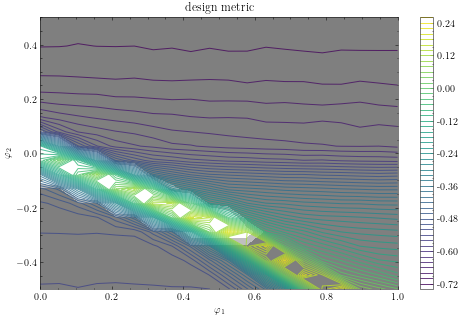

In [57]:
fig, axis = plt.subplots(figsize=(8,5))

Z_mean=Z_.sum(axis=0)
c0=axis.contour(X.transpose(), Y.transpose() ,Z_mean[:,:],50,alpha=0.8)
axis.contourf(X.transpose(), Y.transpose() ,Q[0,:,:],levels=[-np.inf,-5,-4],colors=['black','grey'],linestyles='-',alpha=0.5)
# plt.plot(opar)
axis.set_xlabel(r'$\varphi_1$')
axis.set_ylabel(r'$\varphi_2$')
#     axis.set_ylim([-0.5,0.5])
#     axis.set_xlim([0,1])
axis.set_title('design metric')
fig.colorbar(c0,ax=axis,format='%.2f')

# plt.savefig('c30_mean_metric_winter_lowrss')
plt.show()

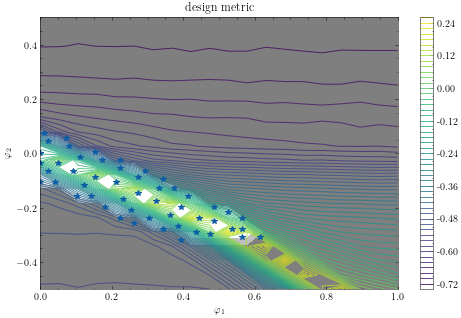

In [66]:
fig, axis = plt.subplots(figsize=(8,5))

Z_mean=Z_.sum(axis=0)
c0=axis.contour(X.transpose(), Y.transpose() ,Z_mean[:,:],50,alpha=0.8)
axis.contourf(X.transpose(), Y.transpose() ,Q[0,:,:],levels=[-np.inf,-5,-4],colors=['black','grey'],linestyles='-',alpha=0.5)
plt.plot(opar.transpose()[0],opar.transpose()[1],'*')
axis.set_xlabel(r'$\varphi_1$')
axis.set_ylabel(r'$\varphi_2$')
#     axis.set_ylim([-0.5,0.5])
#     axis.set_xlim([0,1])
axis.set_title('design metric')
fig.colorbar(c0,ax=axis,format='%.2f')

plt.savefig('c30_mean_metric_winter_lowrss_search')
plt.show()

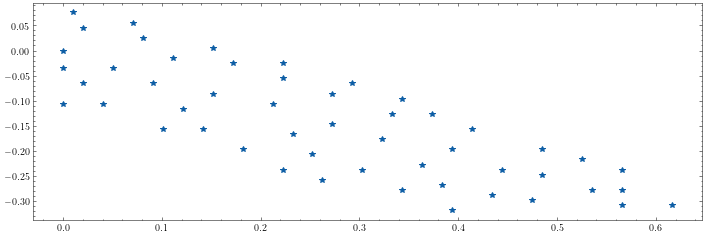

In [63]:
opar=get_data('parameters_search_winter_c_3_0_2022_01_27_0742.csv')
plt.plot(opar.transpose()[0],opar.transpose()[1],'*')
